In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

# EDA

In [2]:
RAW_PATH = Path("../data/raw/_roads.tsv")
OUT_PATH = Path("../data/processed/_roads.tsv")

In [3]:
road=pd.read_csv(RAW_PATH, sep='\t', low_memory=False)
road

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4035,Unnamed: 4036,Unnamed: 4037,Unnamed: 4038,Unnamed: 4039,Unnamed: 4040,Unnamed: 4041,Unnamed: 4042,Unnamed: 4043,Unnamed: 4044
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ---- Load wide file (like you already did) ----
road = road.copy()

# Make sure first column is named 'road'
road = road.rename(columns={road.columns[0]: "road"})

tidy_rows = []

for _, row in road.iterrows():
    road_name = row["road"]
    
    # Everything after first column are repeating triples
    values = row.iloc[1:].values
    
    # Loop through in steps of 3 (lrp, lat, lon)
    for i in range(0, len(values), 3):
        try:
            lrp = values[i]
            lat = values[i+1]
            lon = values[i+2]
        except IndexError:
            break  # incomplete triple at end
        
        # Skip completely empty triples
        if pd.isna(lrp) and pd.isna(lat) and pd.isna(lon):
            continue
        
        tidy_rows.append({
            "road": road_name,
            "lrp": lrp,
            "lat": pd.to_numeric(lat, errors="coerce"),
            "lon": pd.to_numeric(lon, errors="coerce")
        })

# Create tidy dataframe
tidy = pd.DataFrame(tidy_rows)

# Drop rows where everything is missing
tidy = tidy.dropna(subset=["lrp", "lat", "lon"], how="all")

# Reset index
tidy = tidy.reset_index(drop=True)

print("Tidy shape:", tidy.shape)
tidy

Tidy shape: (52210, 4)


,road,lrp,lat,lon
0,N1,LRPS,23.706028,90.443333
1,N1,LRPSa,23.702917,90.450417
2,N1,LRPSb,23.702778,90.450472
3,N1,LRP001,23.702139,90.451972
4,N1,LRP002,23.697889,90.460583
...,...,...,...,...
52205,Z8943,LRP007,22.429499,90.785722
52206,Z8943,LRP008,22.430110,90.776333
52207,Z8943,LRP008a,22.430249,90.774888
52208,Z8943,LRP008b,22.430249,90.774860


In [5]:
print("Rows before:", len(tidy))

tidy = tidy.drop_duplicates(subset=["road", "lrp"])

print("Rows after:", len(tidy))
dup_check = tidy.duplicated(subset=["road", "lrp"]).sum()
print("Remaining duplicates:", dup_check)

Rows before: 52210
Rows after: 51926
Remaining duplicates: 0


In [6]:
print("Number of roads:", tidy["road"].nunique())
print("Total points:", len(tidy))

print("\nLatitude summary:")
print(tidy["lat"].describe())

print("\nLongitude summary:")
print(tidy["lon"].describe())

Number of roads: 877
Total points: 51926

Latitude summary:
count    51926.000000
mean        23.825781
std          1.145005
min          2.643639
25%         22.934527
50%         23.828458
75%         24.718277
max         32.561222
Name: lat, dtype: float64

Longitude summary:
count    51926.000000
mean        90.275652
std          1.087424
min         82.460278
25%         89.361868
50%         90.171833
75%         91.088770
max         93.298416
Name: lon, dtype: float64


In [7]:
# Bangladesh rough bounding box
invalid_bd = tidy[
    (tidy["lat"] < 20) | (tidy["lat"] > 27) |
    (tidy["lon"] < 88) | (tidy["lon"] > 93)
]

print("Outside Bangladesh bounds:", len(invalid_bd))
invalid_bd

Outside Bangladesh bounds: 21


,road,lrp,lat,lon
2690,N2,LRP113b,27.126944,91.319110
27617,Z1813,LRP013c,22.197833,93.298416
33190,Z4021,LRP026a,25.066777,87.809444
36445,Z5058,LRP008,27.287777,89.647472
38324,Z5463,LRP021a,24.797722,87.706333
41679,Z6031,LRP015,24.110500,85.327805
43343,Z7023,LRP039,23.255972,87.797250
43778,Z7045,LRP017a,27.944111,89.790694
44833,Z7461,LRP003b,23.950278,87.963556
45366,Z7504,LRP010,23.234583,82.460278


In [8]:
roads3 = pd.read_csv("../data/raw/_roads3.csv")

# Keep only geometry columns for comparison
roads3_tidy = roads3[["road", "lrp", "lat", "lon"]].copy()

# Ensure numeric
roads3_tidy["lat"] = pd.to_numeric(roads3_tidy["lat"], errors="coerce")
roads3_tidy["lon"] = pd.to_numeric(roads3_tidy["lon"], errors="coerce")

roads3_tidy = roads3_tidy.dropna(subset=["lat","lon"]).reset_index(drop=True)

print("roads3_tidy shape:", roads3_tidy.shape)
roads3_tidy


roads3_tidy shape: (51348, 4)


,road,lrp,lat,lon
0,N1,LRPS,23.706028,90.443333
1,N1,LRPSa,23.702917,90.450417
2,N1,LRPSb,23.702778,90.450472
3,N1,LRP001,23.702139,90.451972
4,N1,LRP002,23.697889,90.460583
...,...,...,...,...
51343,Z8943,LRP007,22.429499,90.785722
51344,Z8943,LRP008,22.430110,90.776333
51345,Z8943,LRP008a,22.430249,90.774888
51346,Z8943,LRP008b,22.430249,90.774860


In [9]:
tidy.shape, roads3_tidy.shape

((51926, 4), (51348, 4))

In [10]:
print("Duplicates in raw tidy:", tidy.duplicated(["road","lrp"]).sum())

roads_raw = set(tidy["road"].unique())
roads_prof = set(roads3_tidy["road"].unique())

extra_roads = roads_raw - roads_prof
print("Extra roads:", len(extra_roads))

rows_from_extra_roads = tidy[tidy["road"].isin(extra_roads)]
print("Rows from extra roads:", len(rows_from_extra_roads))

print("Total row difference:", len(tidy) - len(roads3_tidy))

Duplicates in raw tidy: 0
Extra roads: 30
Rows from extra roads: 191
Total row difference: 578


In [11]:
# Count points per road
pts_per_road = tidy.groupby("road").size()

# Keep roads with more than 3 points
roads_to_keep = pts_per_road[pts_per_road > 3].index

print("Rows before:", len(tidy))
print("Roads before:", tidy["road"].nunique())

# Overwrite tidy
tidy = tidy[tidy["road"].isin(roads_to_keep)].copy()

print("Rows after:", len(tidy))
print("Roads after:", tidy["road"].nunique())

Rows before: 51926
Roads before: 877
Rows after: 51861
Roads after: 852


In [12]:
print("Your rows:", len(tidy))
print("Professor rows:", len(roads3_tidy))
print("Difference:", len(tidy) - len(roads3_tidy))

Your rows: 51861
Professor rows: 51348
Difference: 513


In [13]:
roads_tidy = set(tidy["road"].dropna().unique())
roads_prof = set(roads3_tidy["road"].dropna().unique())

only_in_tidy = sorted(roads_tidy - roads_prof)
only_in_prof = sorted(roads_prof - roads_tidy)

print("Roads only in tidy:", len(only_in_tidy))
print("Roads only in professor:", len(only_in_prof))
only_in_tidy

Roads only in tidy: 5
Roads only in professor: 0


['N211', 'R822', 'Z1025', 'Z1447', 'Z1605']

# Fixing the Road

In [14]:
import re

_lrp_re = re.compile(r"^LRP(\d+)([A-Za-z]*)$")

def lrp_sort_key(lrp: str):
    """
    Returns a tuple used for sorting LRPs in chainage-like order:
    LRPS, LRPSa, LRPSb ... first
    then LRP001, LRP001a, LRP001b ...
    then ...
    LRPE last
    Unknown formats go to the end (but before LRPE).
    """
    if pd.isna(lrp):
        return (10**9, "zz")  # push NA to end
    
    s = str(lrp).strip()

    # Start markers
    if s == "LRPS":
        return (-1, "")
    if s.startswith("LRPS") and len(s) > 4:
        # LRPSa, LRPSb ...
        return (-1, s[4:])

    # End marker
    if s == "LRPE":
        return (10**12, "zzzz")

    # Standard LRP###suffix
    m = _lrp_re.match(s)
    if m:
        num = int(m.group(1))
        suf = m.group(2) or ""
        return (num, suf)

    # fallback for weird labels
    return (10**9, s)

def sort_road_by_lrp(df_points):
    df = df_points.copy()
    df["_k"] = df["lrp"].apply(lrp_sort_key)
    df = df.sort_values("_k").drop(columns="_k").reset_index(drop=True)
    return df


In [15]:
# ----------------------------
# Distance
# ----------------------------
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def compute_segments(df):
    """Adds next_lat/next_lon + seg distance. Expects ordered points."""
    out = df.copy()
    out["next_lat"] = out["lat"].shift(-1)
    out["next_lon"] = out["lon"].shift(-1)
    out["seg"] = haversine(out["lat"], out["lon"], out["next_lat"], out["next_lon"])
    return out

# ----------------------------
# Stage A: Block repair
# ----------------------------
def block_repair(df_points, K=15, min_run_len=2):
    """
    Detect consecutive jump segments and linearly interpolate across the block.
    df_points: columns ['lrp','lat','lon'] in correct order.
    Returns: fixed_df, actions(list)
    """
    df = compute_segments(df_points).reset_index(drop=True)
    median_seg = df["seg"].median()
    thr = K * median_seg

    df["is_jump_seg"] = df["seg"] > thr
    df["run_id"] = (df["is_jump_seg"] != df["is_jump_seg"].shift()).cumsum()

    jump_runs = df[df["is_jump_seg"]].groupby("run_id").indices
    fixed = df_points.copy().reset_index(drop=True)
    actions = []

    for run_id, idxs in jump_runs.items():
        idxs = list(idxs)
        if len(idxs) < min_run_len:
            continue

        # segments idxs[0]..idxs[-1] correspond to points [left_idx .. right_idx]
        left_idx = idxs[0]
        right_idx = idxs[-1] + 1

        # bounds + must have endpoints
        if left_idx <= 0 or right_idx >= len(fixed):
            continue
        if fixed.loc[left_idx, ["lat","lon"]].isna().any() or fixed.loc[right_idx, ["lat","lon"]].isna().any():
            continue

        L = right_idx - left_idx
        for k in range(1, L):
            new_lat = fixed.loc[left_idx, "lat"] + (fixed.loc[right_idx, "lat"] - fixed.loc[left_idx, "lat"]) * (k / L)
            new_lon = fixed.loc[left_idx, "lon"] + (fixed.loc[right_idx, "lon"] - fixed.loc[left_idx, "lon"]) * (k / L)

            old_lat, old_lon = fixed.loc[left_idx+k, "lat"], fixed.loc[left_idx+k, "lon"]
            fixed.loc[left_idx+k, "lat"] = new_lat
            fixed.loc[left_idx+k, "lon"] = new_lon

            actions.append({
                "idx": left_idx+k,
                "lrp": fixed.loc[left_idx+k, "lrp"],
                "action": "block_interp",
                "old_lat": old_lat, "old_lon": old_lon,
                "new_lat": new_lat, "new_lon": new_lon,
                "run_len": len(idxs),
                "thr_km": thr
            })

    return fixed, actions

# ----------------------------
# Stage B: Smart single-segment repair
# ----------------------------
def smart_single_seg_repair(df_points, K=15, max_iters=5):
    """
    Fix remaining isolated jump segments by deciding whether to adjust point i or i+1.
    df_points: columns ['lrp','lat','lon'] ordered.
    Returns: fixed_df, actions(list)
    """
    df = df_points.copy().reset_index(drop=True)
    actions = []

    for _ in range(max_iters):
        tmp = compute_segments(df)
        med = tmp["seg"].median()
        thr = K * med

        bad_idxs = tmp.index[tmp["seg"] > thr].tolist()
        if not bad_idxs:
            break

        for i in bad_idxs:
            # need neighborhood i-1, i, i+1, i+2
            if i <= 0 or i >= len(df)-2:
                continue

            p_im1 = (df.loc[i-1, "lat"], df.loc[i-1, "lon"])
            p_i   = (df.loc[i,   "lat"], df.loc[i,   "lon"])
            p_ip1 = (df.loc[i+1, "lat"], df.loc[i+1, "lon"])
            p_ip2 = (df.loc[i+2, "lat"], df.loc[i+2, "lon"])

            if any(pd.isna([*p_im1, *p_i, *p_ip1, *p_ip2])):
                continue

            cur = (
                haversine(p_im1[0], p_im1[1], p_i[0], p_i[1]) +
                haversine(p_i[0], p_i[1], p_ip1[0], p_ip1[1]) +
                haversine(p_ip1[0], p_ip1[1], p_ip2[0], p_ip2[1])
            )

            # Fix A: adjust point i
            fixA = ((p_im1[0] + p_ip1[0]) / 2, (p_im1[1] + p_ip1[1]) / 2)
            scoreA = (
                haversine(p_im1[0], p_im1[1], fixA[0], fixA[1]) +
                haversine(fixA[0], fixA[1], p_ip1[0], p_ip1[1]) +
                haversine(p_ip1[0], p_ip1[1], p_ip2[0], p_ip2[1])
            )

            # Fix B: adjust point i+1
            fixB = ((p_i[0] + p_ip2[0]) / 2, (p_i[1] + p_ip2[1]) / 2)
            scoreB = (
                haversine(p_im1[0], p_im1[1], p_i[0], p_i[1]) +
                haversine(p_i[0], p_i[1], fixB[0], fixB[1]) +
                haversine(fixB[0], fixB[1], p_ip2[0], p_ip2[1])
            )

            best = min(cur, scoreA, scoreB)
            if best >= cur:
                continue

            if best == scoreA:
                old_lat, old_lon = df.loc[i, "lat"], df.loc[i, "lon"]
                df.loc[i, "lat"], df.loc[i, "lon"] = fixA
                actions.append({
                    "idx": i,
                    "lrp": df.loc[i, "lrp"],
                    "action": "smart_fix_i_mid(im1,ip1)",
                    "old_lat": old_lat, "old_lon": old_lon,
                    "new_lat": fixA[0], "new_lon": fixA[1],
                    "thr_km": thr
                })
            else:
                old_lat, old_lon = df.loc[i+1, "lat"], df.loc[i+1, "lon"]
                df.loc[i+1, "lat"], df.loc[i+1, "lon"] = fixB
                actions.append({
                    "idx": i+1,
                    "lrp": df.loc[i+1, "lrp"],
                    "action": "smart_fix_i+1_mid(i,ip2)",
                    "old_lat": old_lat, "old_lon": old_lon,
                    "new_lat": fixB[0], "new_lon": fixB[1],
                    "thr_km": thr
                })

    return df, actions

def end_point_anomaly_repair(df_points, K=15, max_iters=2):
    """
    Fix LRPE (last point) anomalies if the last segment is a jump.
    Only adjusts the last point using simple extrapolation from the previous two points.
    df_points: columns ['lrp','lat','lon'] ordered.
    Returns: fixed_df, actions(list)
    """
    df = df_points.copy().reset_index(drop=True)
    actions = []

    for _ in range(max_iters):
        tmp = compute_segments(df)
        med = tmp["seg"].median()
        if pd.isna(med) or med == 0 or len(df) < 3:
            break

        thr = K * med
        last_seg = tmp.loc[len(df) - 2, "seg"]  # segment (n-2)->(n-1)

        # no issue
        if pd.isna(last_seg) or last_seg <= thr:
            break

        # need last 3 points: n-3, n-2, n-1
        n = len(df)
        p_nm3 = (df.loc[n-3, "lat"], df.loc[n-3, "lon"])
        p_nm2 = (df.loc[n-2, "lat"], df.loc[n-2, "lon"])
        p_nm1 = (df.loc[n-1, "lat"], df.loc[n-1, "lon"])

        if any(pd.isna([*p_nm3, *p_nm2, *p_nm1])):
            break

        # Extrapolate last point along direction (n-3)->(n-2)
        new_lat = p_nm2[0] + (p_nm2[0] - p_nm3[0])
        new_lon = p_nm2[1] + (p_nm2[1] - p_nm3[1])

        old_lat, old_lon = df.loc[n-1, "lat"], df.loc[n-1, "lon"]
        df.loc[n-1, "lat"], df.loc[n-1, "lon"] = new_lat, new_lon

        actions.append({
            "idx": n-1,
            "lrp": df.loc[n-1, "lrp"],
            "action": "end_extrap_lrpe",
            "old_lat": old_lat, "old_lon": old_lon,
            "new_lat": new_lat, "new_lon": new_lon,
            "thr_km": thr,
            "last_seg_km": float(last_seg),
        })

    return df, actions

# ----------------------------
# Full repair for one road
# ----------------------------
def repair_road_points(df_road_points, K=15, min_run_len=2):
    df_road_points = sort_road_by_lrp(df_road_points)

    before = compute_segments(df_road_points)
    before_med = before["seg"].median()
    before_thr = K * before_med
    before_jumps = int((before["seg"] > before_thr).sum())
    before_max = float(before["seg"].max())

    fixedA, actionsA = block_repair(df_road_points, K=K, min_run_len=min_run_len)
    fixedB, actionsB = smart_single_seg_repair(fixedA, K=K)

    # ✅ NEW: end-point anomaly repair (LRPE)
    fixedC, actionsC = end_point_anomaly_repair(fixedB, K=K)

    after = compute_segments(fixedC)
    after_med = after["seg"].median()
    after_thr = K * after_med
    after_jumps = int((after["seg"] > after_thr).sum())
    after_max = float(after["seg"].max())

    metrics = {
        "median_seg_before": before_med,
        "thr_before": before_thr,
        "jumps_before": before_jumps,
        "max_seg_before": before_max,
        "median_seg_after": after_med,
        "thr_after": after_thr,
        "jumps_after": after_jumps,
        "max_seg_after": after_max,
        "actions_block": len(actionsA),
        "actions_smart": len(actionsB),
        "actions_end": len(actionsC),
        "actions_total": len(actionsA) + len(actionsB) + len(actionsC),
    }

    actions = actionsA + actionsB + actionsC
    return fixedC, actions, metrics

# ----------------------------
# Plot before/after for a road
# ----------------------------
def plot_road_before_after(tidy_df, road_name, fixed_df=None, K=15, title_suffix=""):
    """
    tidy_df: full tidy dataframe (road, lrp, lat, lon) in original order
    fixed_df: optional fixed points (lrp, lat, lon) for the road; if None we repair on the fly.
    """
    road_pts = tidy_df[tidy_df["road"] == road_name][["lrp","lat","lon"]].copy().reset_index(drop=True)

    if fixed_df is None:
        fixed_df, _, metrics = repair_road_points(road_pts, K=K)
    else:
        metrics = None

    # plot side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].plot(road_pts["lon"], road_pts["lat"], marker="o", markersize=2, linewidth=1)
    axes[0].set_title(f"{road_name} BEFORE {title_suffix}")
    axes[0].set_xlabel("Longitude")
    axes[0].set_ylabel("Latitude")

    axes[1].plot(fixed_df["lon"], fixed_df["lat"], marker="o", markersize=2, linewidth=1)
    axes[1].set_title(f"{road_name} AFTER {title_suffix}")
    axes[1].set_xlabel("Longitude")
    axes[1].set_ylabel("Latitude")

    plt.tight_layout()
    plt.show()

    if metrics is not None:
        print(metrics)

# ----------------------------
# Repair ALL roads
# ----------------------------
def repair_all_roads(tidy_df, K=15, min_run_len=2, max_roads=None):
    """
    tidy_df: columns ['road','lrp','lat','lon'] in original order
    Returns: cleaned_tidy_df, actions_df, metrics_df
    """
    cleaned_parts = []
    all_actions = []
    all_metrics = []

    roads = tidy_df["road"].dropna().unique().tolist()
    if max_roads is not None:
        roads = roads[:max_roads]

    for r in roads:
        road_pts = tidy_df[tidy_df["road"] == r][["lrp","lat","lon"]].copy().reset_index(drop=True)
        fixed_pts, actions, metrics = repair_road_points(road_pts, K=K, min_run_len=min_run_len)

        fixed_out = fixed_pts.copy()
        fixed_out.insert(0, "road", r)
        cleaned_parts.append(fixed_out)

        for a in actions:
            a["road"] = r
        all_actions.extend(actions)

        metrics["road"] = r
        all_metrics.append(metrics)

    cleaned = pd.concat(cleaned_parts, ignore_index=True)
    actions_df = pd.DataFrame(all_actions)
    metrics_df = pd.DataFrame(all_metrics)

    return cleaned, actions_df, metrics_df


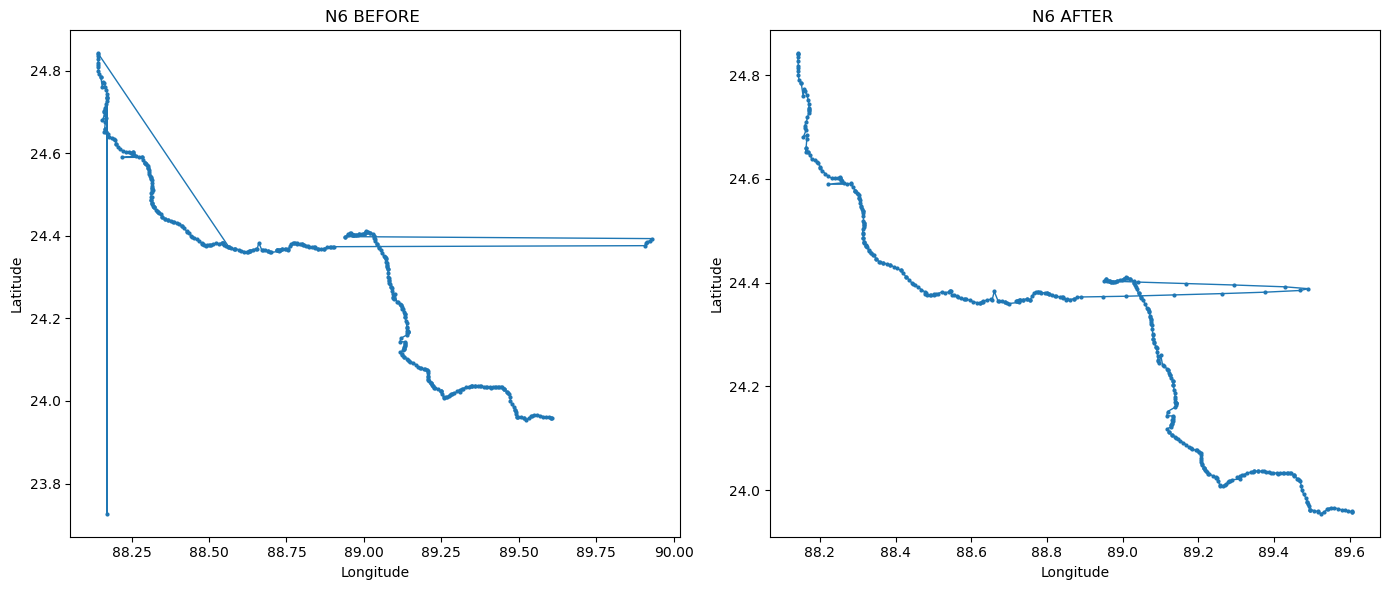

{'median_seg_before': np.float64(0.539430031216072), 'thr_before': np.float64(8.09145046824108), 'jumps_before': 5, 'max_seg_before': 111.93011058173765, 'median_seg_after': np.float64(0.5453588593772316), 'thr_after': np.float64(8.180382890658475), 'jumps_after': 8, 'max_seg_after': 13.634949429947241, 'actions_block': 1, 'actions_smart': 33, 'actions_end': 1, 'actions_total': 35}


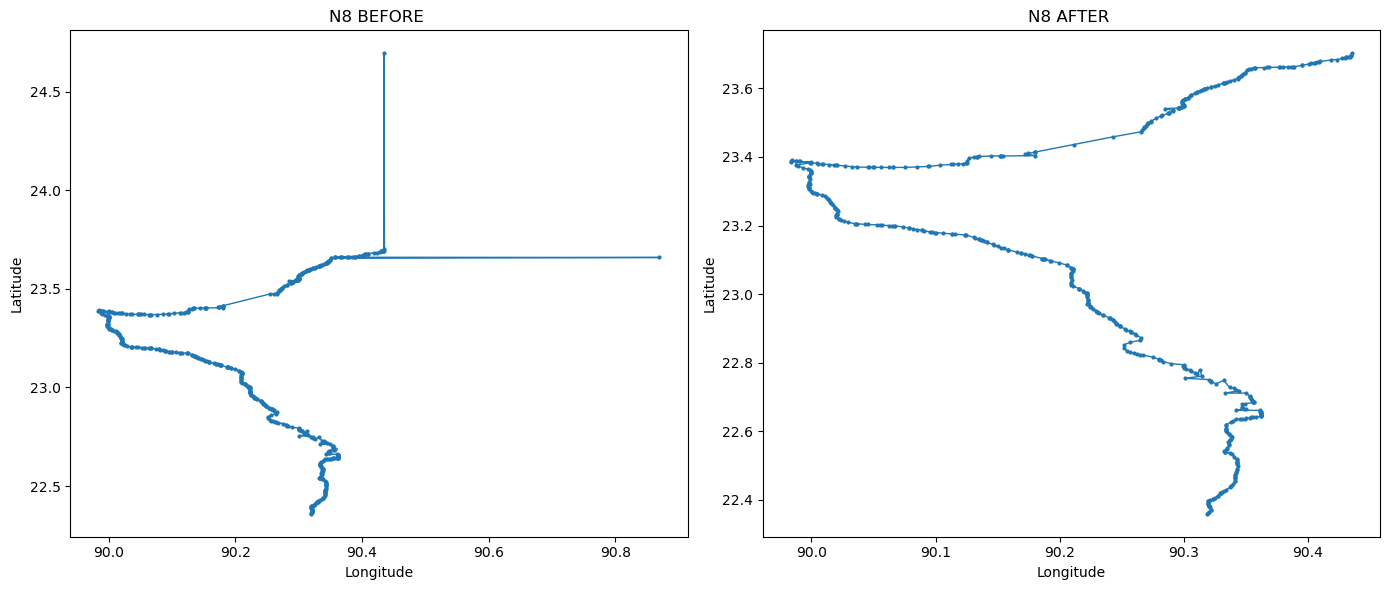

{'median_seg_before': np.float64(0.3186359366109248), 'thr_before': np.float64(4.779539049163873), 'jumps_before': 5, 'max_seg_before': 111.21037161986999, 'median_seg_after': np.float64(0.3167099459429208), 'thr_after': np.float64(4.750649189143812), 'jumps_after': 0, 'max_seg_after': 4.054485533659262, 'actions_block': 1, 'actions_smart': 6, 'actions_end': 0, 'actions_total': 7}


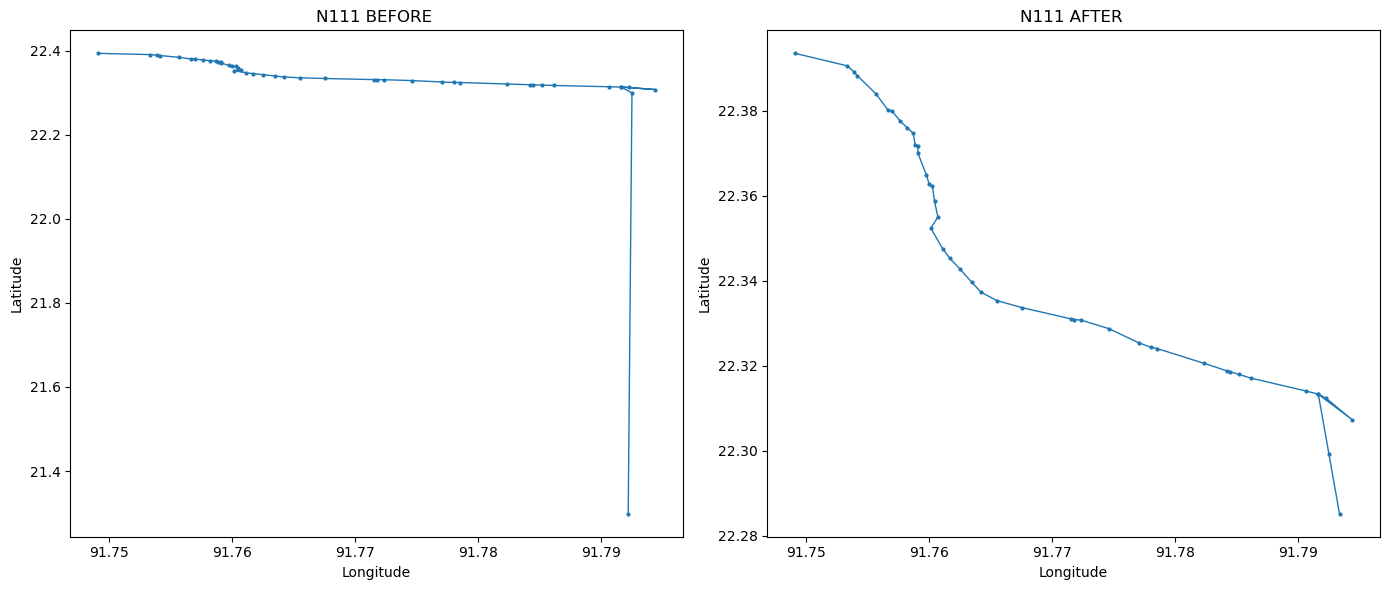

{'median_seg_before': np.float64(0.2708457043236544), 'thr_before': np.float64(4.062685564854816), 'jumps_before': 1, 'max_seg_before': 111.27832730939268, 'median_seg_after': np.float64(0.2708457043236544), 'thr_after': np.float64(4.062685564854816), 'jumps_after': 0, 'max_seg_after': 1.565453672914364, 'actions_block': 0, 'actions_smart': 0, 'actions_end': 1, 'actions_total': 1}


In [16]:
plot_road_before_after(tidy, "N6", K=15)
plot_road_before_after(tidy, "N8", K=15)
plot_road_before_after(tidy, "N111", K=15)   # pick any road you know is messy


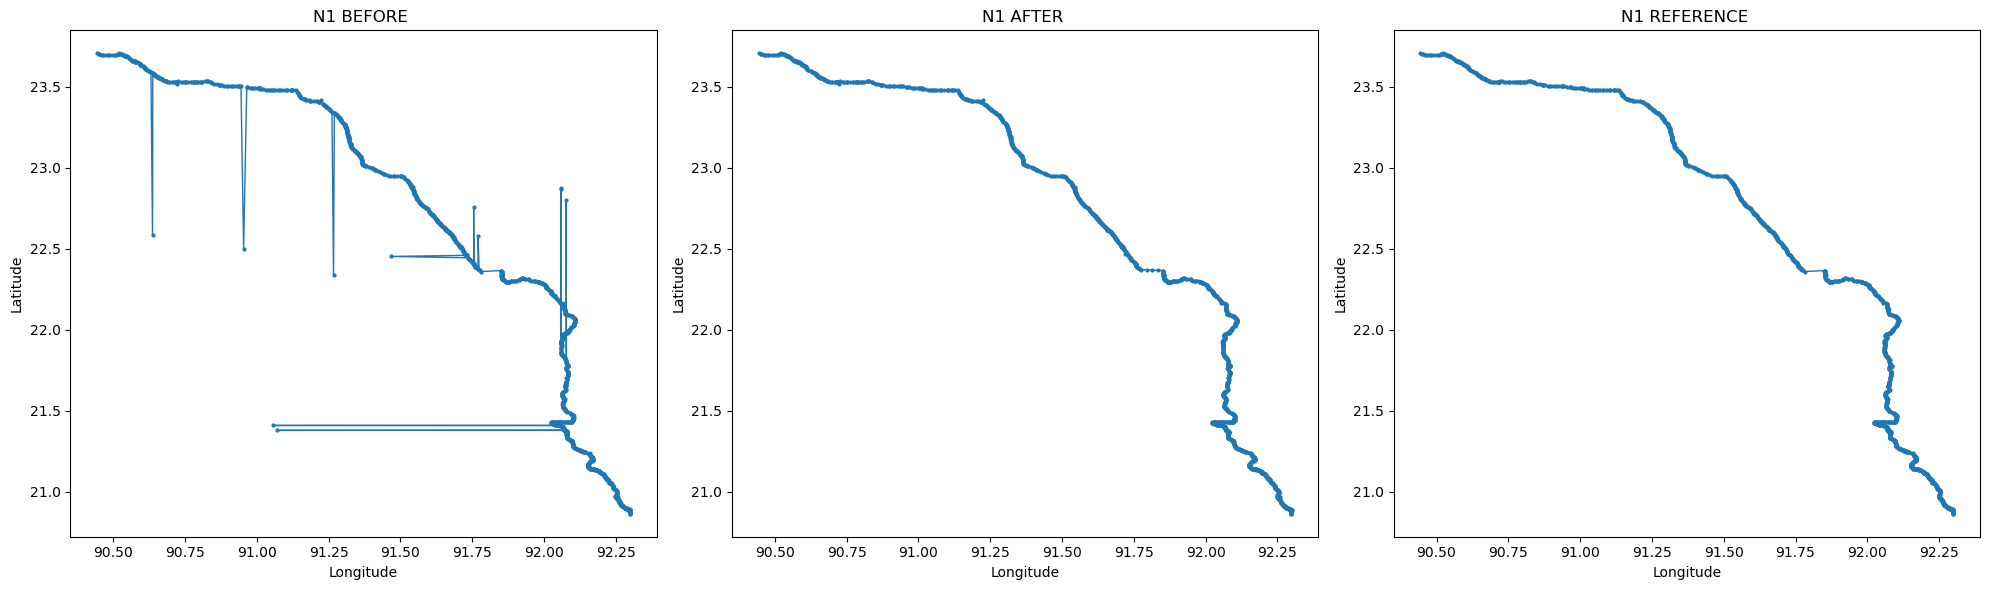

{'median_seg_before': np.float64(0.24966877898556183), 'thr_before': np.float64(3.7450316847834273), 'jumps_before': 23, 'max_seg_before': 112.16489375714208, 'median_seg_after': np.float64(0.25243396534927465), 'thr_after': np.float64(3.7865094802391197), 'jumps_after': 0, 'max_seg_after': 2.8560856083097277, 'actions_block': 9, 'actions_smart': 32, 'actions_end': 0, 'actions_total': 41}


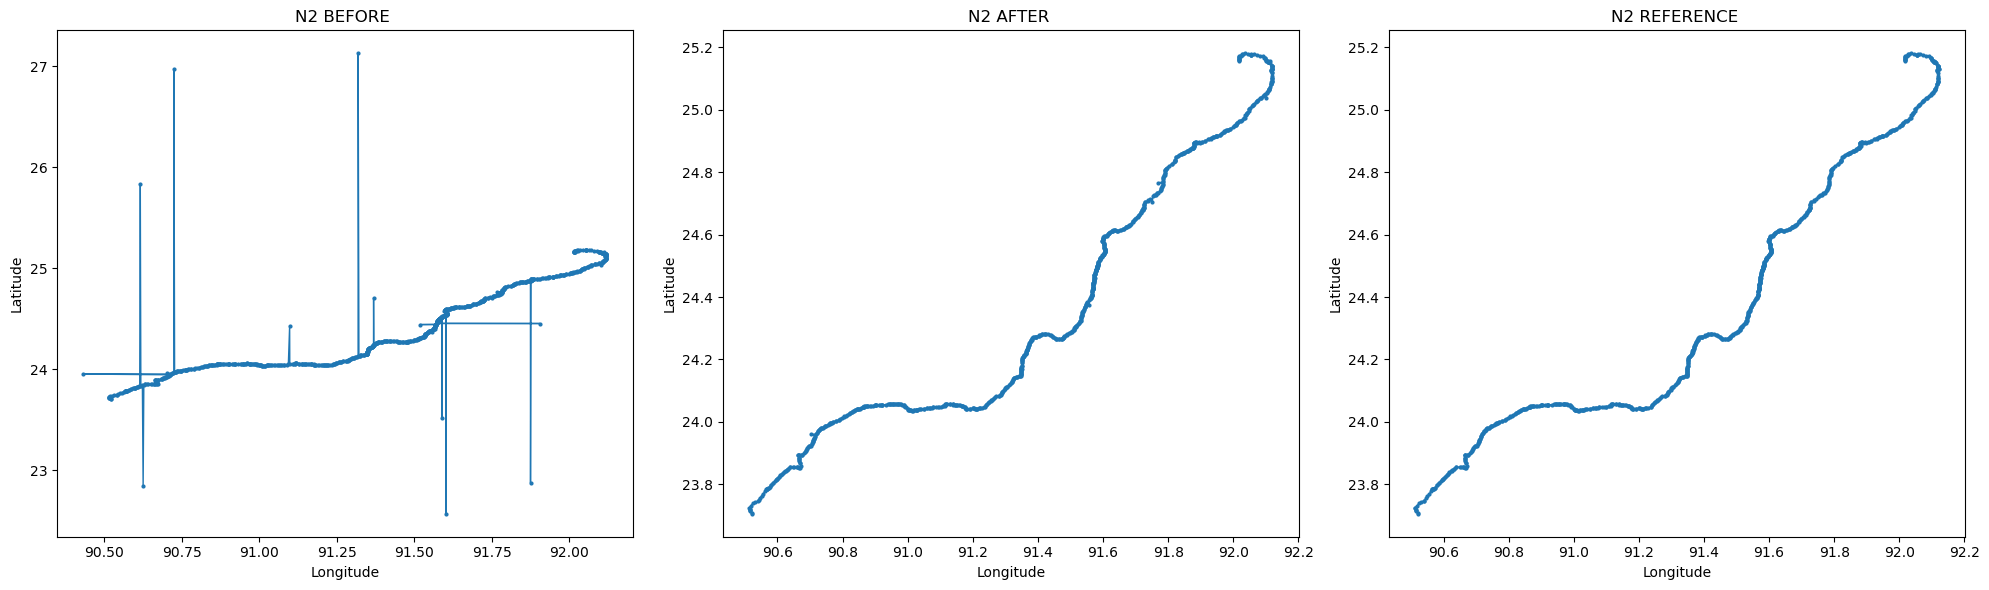

{'median_seg_before': np.float64(0.27002073788171577), 'thr_before': np.float64(4.050311068225737), 'jumps_before': 24, 'max_seg_before': 333.61567045487607, 'median_seg_after': np.float64(0.2650569699659913), 'thr_after': np.float64(3.9758545494898696), 'jumps_after': 0, 'max_seg_after': 2.2702737979702183, 'actions_block': 11, 'actions_smart': 24, 'actions_end': 0, 'actions_total': 35}


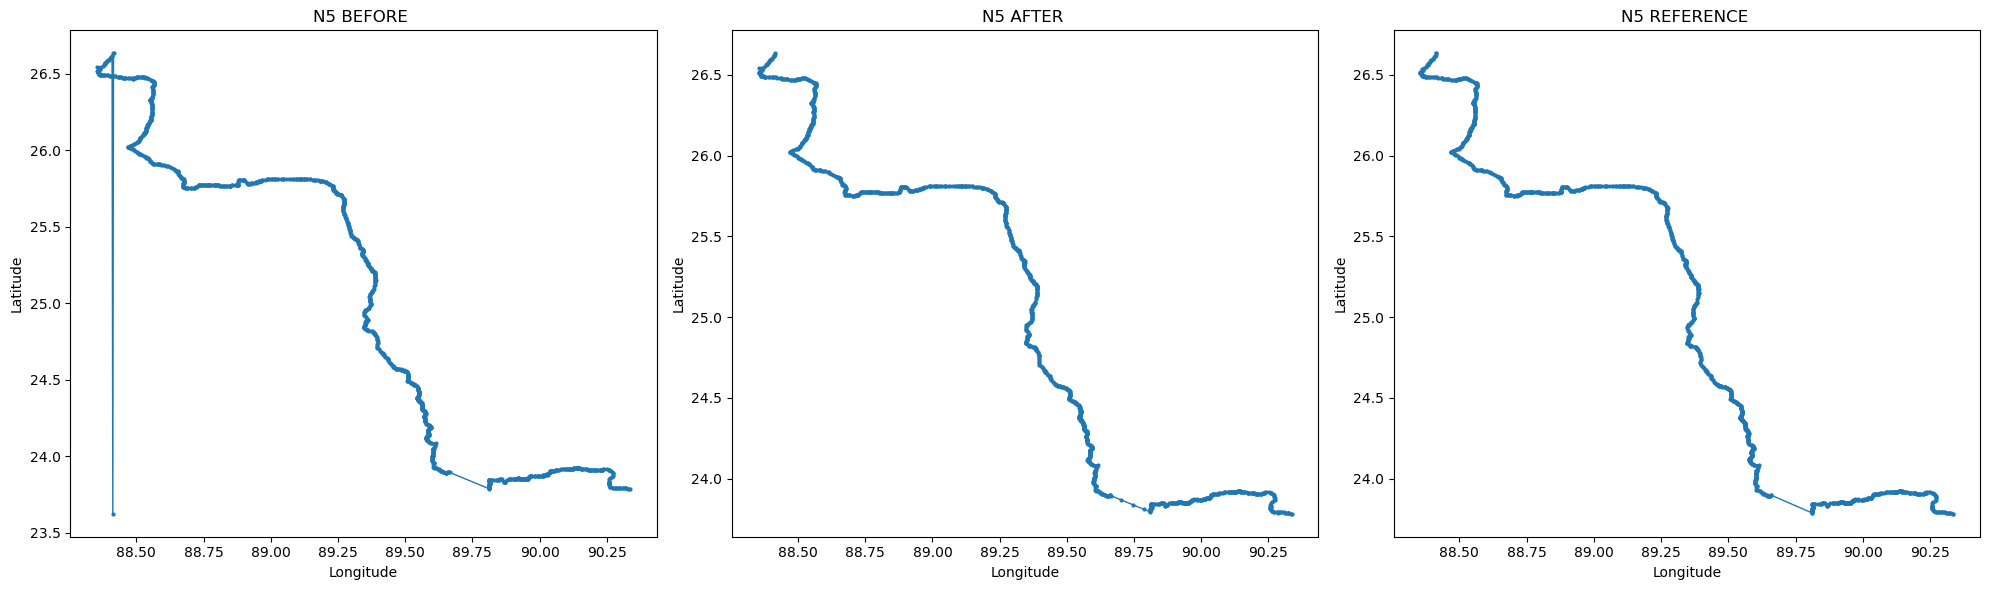

{'median_seg_before': np.float64(0.3324374720258134), 'thr_before': np.float64(4.986562080387201), 'jumps_before': 3, 'max_seg_before': 334.542391610489, 'median_seg_after': np.float64(0.3365250021009911), 'thr_after': np.float64(5.047875031514867), 'jumps_after': 3, 'max_seg_after': 5.4981509475008, 'actions_block': 1, 'actions_smart': 12, 'actions_end': 0, 'actions_total': 13}


(          lrp        lat        lon
 0        LRPS  23.783777  90.336416
 1       LRPSa  23.784666  90.334139
 2      LRP001  23.787347  90.327972
 3     LRP001a  23.790027  90.321805
 4     LRP001b  23.790000  90.321277
 ...       ...        ...        ...
 1222  LRP521a  26.614611  88.409056
 1223   LRP522  26.615944  88.409417
 1224   LRP523  26.624569  88.412083
 1225   LRP524  26.628895  88.413458
 1226     LRPE  26.633222  88.414833
 
 [1227 rows x 3 columns],
 [{'idx': np.int64(2),
   'lrp': 'LRP001',
   'action': 'block_interp',
   'old_lat': np.float64(23.7872497),
   'old_lon': np.float64(90.3279438),
   'new_lat': np.float64(23.78734685),
   'new_lon': np.float64(90.32797175000002),
   'run_len': 2,
   'thr_km': np.float64(4.986562080387201)},
  {'idx': 242,
   'lrp': 'LRP078a',
   'action': 'smart_fix_i_mid(im1,ip1)',
   'old_lat': np.float64(23.7893052),
   'old_lon': np.float64(89.8101944),
   'new_lat': np.float64(23.844860750000002),
   'new_lon': np.float64(89.7358611

In [33]:
def plot_road_before_after_prof(tidy_df, road_name, prof_df, fixed_df=None, K=15, title_suffix=""):
    """
    tidy_df: your full tidy dataframe (road, lrp, lat, lon)
    prof_df: professor tidy dataframe (road, lrp, lat, lon)
    fixed_df: optional fixed points df for the road (lrp, lat, lon). If None -> repair on the fly.
    """
    # BEFORE (yours raw)
    road_pts = (
        tidy_df[tidy_df["road"] == road_name][["lrp","lat","lon"]]
        .copy()
        .reset_index(drop=True)
    )

    if road_pts.empty:
        print(f"Road {road_name} not found in tidy_df.")
        return

    # AFTER (yours fixed)
    if fixed_df is None:
        fixed_df, actions, metrics = repair_road_points(road_pts, K=K)
    else:
        actions, metrics = None, None

    # PROFESSOR
    prof_pts = (
        prof_df[prof_df["road"] == road_name][["lrp","lat","lon"]]
        .copy()
        .reset_index(drop=True)
    )

    # 3-panel plot
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    axes[0].plot(road_pts["lon"], road_pts["lat"], marker="o", markersize=2, linewidth=1)
    axes[0].set_title(f"{road_name} BEFORE {title_suffix}")
    axes[0].set_xlabel("Longitude")
    axes[0].set_ylabel("Latitude")

    axes[1].plot(fixed_df["lon"], fixed_df["lat"], marker="o", markersize=2, linewidth=1)
    axes[1].set_title(f"{road_name} AFTER {title_suffix}")
    axes[1].set_xlabel("Longitude")
    axes[1].set_ylabel("Latitude")

    if prof_pts.empty:
        axes[2].text(0.5, 0.5, "Road not in reference data", ha="center", va="center")
        axes[2].set_axis_off()
    else:
        axes[2].plot(prof_pts["lon"], prof_pts["lat"], marker="o", markersize=2, linewidth=1)
        axes[2].set_title(f"{road_name} REFERENCE {title_suffix}")
        axes[2].set_xlabel("Longitude")
        axes[2].set_ylabel("Latitude")

    plt.tight_layout()
    plt.show()

    if metrics is not None:
        print(metrics)

    # optionally also return objects if you want to reuse
    return fixed_df, actions, metrics
plot_road_before_after_prof(tidy, "N1", roads3_tidy, K=15)
plot_road_before_after_prof(tidy, "N2", roads3_tidy, K=15)
plot_road_before_after_prof(tidy, "N5", roads3_tidy, K=15)   # pick any road you know is messy

In [28]:
# fix all the roads
cleaned_tidy, actions_df, metrics_df = repair_all_roads(tidy, K=15, min_run_len=2, max_roads=None)
cleaned_tidy, actions_df, metrics_df = repair_all_roads(cleaned_tidy, K=15, min_run_len=2, max_roads=None)
cleaned_tidy, actions_df, metrics_df = repair_all_roads(cleaned_tidy, K=15, min_run_len=2, max_roads=None)

print("Cleaned tidy shape:", cleaned_tidy.shape)

Cleaned tidy shape: (51861, 4)


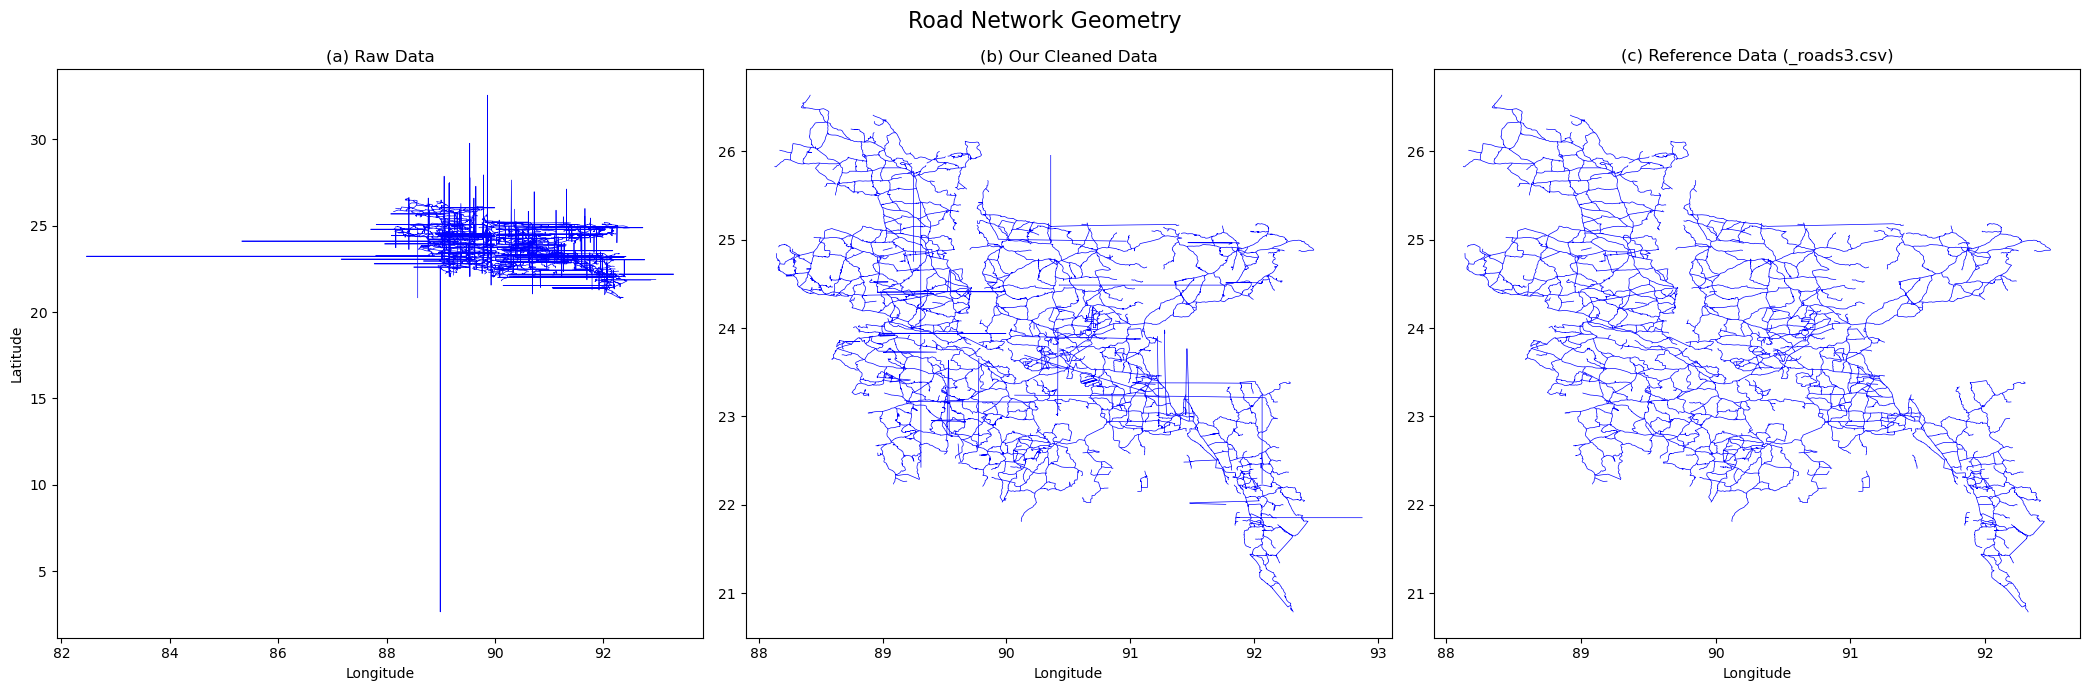

In [53]:
def plot_three_all_roads_lines(before_df, after_df, ref_df):
    fig, axes = plt.subplots(1, 3, figsize=(21, 7))

    datasets = [
        (before_df, "(a) Raw Data"),
        (after_df, "(b) Our Cleaned Data"),
        (ref_df, "(c) Reference Data (_roads3.csv)")
    ]

    for ax, (df, title) in zip(axes, datasets):
        for road, group in df.groupby("road"):
            ax.plot(
                group["lon"],
                group["lat"],
                linewidth=0.5,
                color="blue"
            )

        ax.set_title(title)
        ax.set_xlabel("Longitude")

    # Only left subplot keeps y-label (cleaner for report)
    axes[0].set_ylabel("Latitude")
    axes[1].set_ylabel("")
    axes[2].set_ylabel("")

    fig.suptitle("Road Network Geometry", fontsize=16)
    plt.tight_layout()
    plt.show()


plot_three_all_roads_lines(tidy, cleaned_tidy, roads3_tidy)


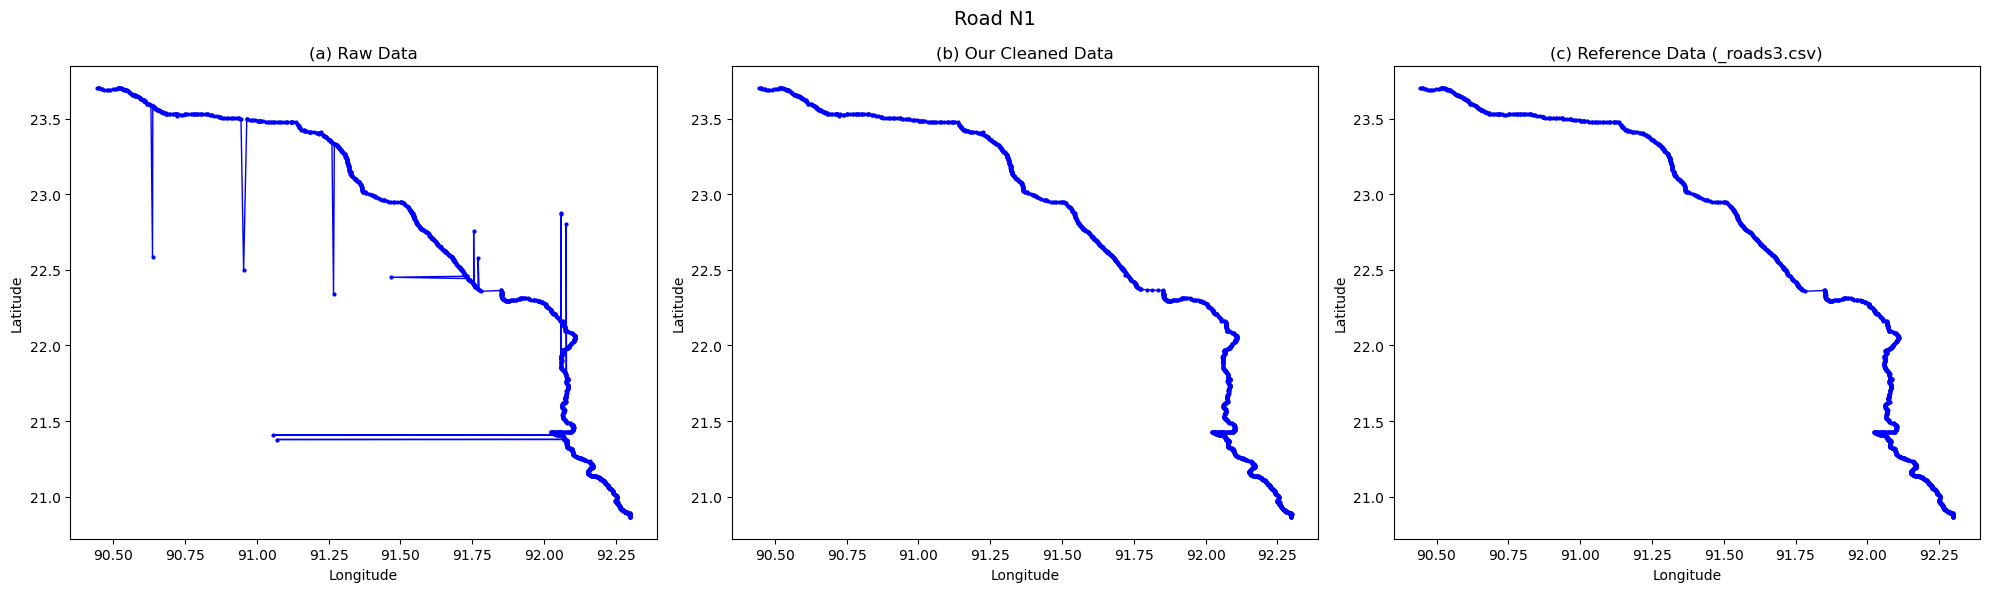

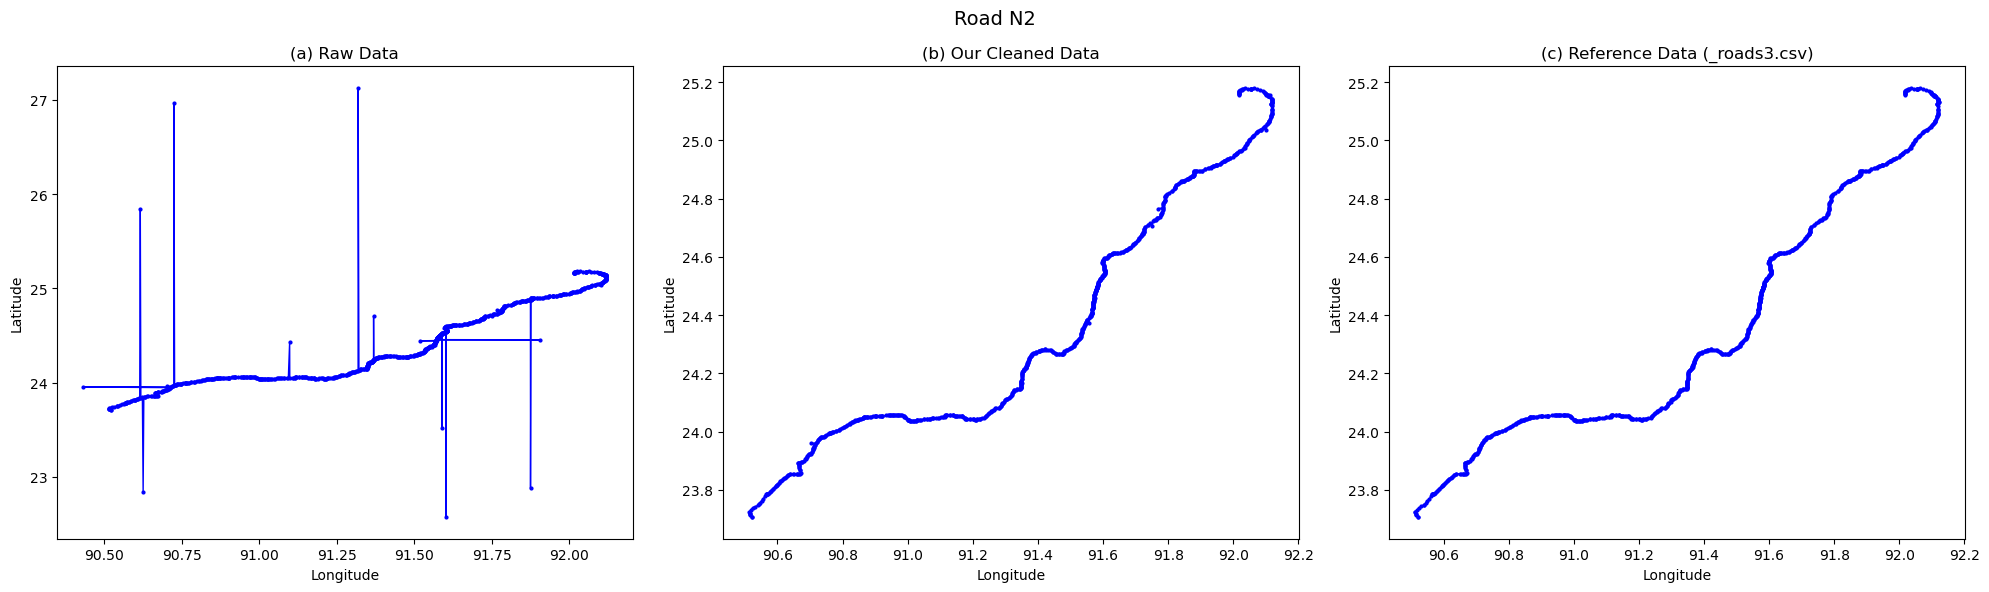

Road N113 not found in raw_tidy.


In [52]:
def plot_road_raw_clean_ref(
    raw_tidy, cleaned_tidy, road_name,
    ref_tidy=None, show_ref=True,
    title_suffix="", figsize=(20, 6),
    marker="o", markersize=2, linewidth=1
):
    """
    raw_tidy: tidy df (road, lrp, lat, lon) - BEFORE
    cleaned_tidy: tidy df (road, lrp, lat, lon) - AFTER (already cleaned; no repair here)
    ref_tidy: tidy df (road, lrp, lat, lon) - REFERENCE (optional)
    """

    # BEFORE
    road_pts = (
        raw_tidy[raw_tidy["road"] == road_name][["lrp", "lat", "lon"]]
        .copy()
        .reset_index(drop=True)
    )
    if road_pts.empty:
        print(f"Road {road_name} not found in raw_tidy.")
        return

    # AFTER (already cleaned)
    cleaned_pts = (
        cleaned_tidy[cleaned_tidy["road"] == road_name][["lrp", "lat", "lon"]]
        .copy()
        .reset_index(drop=True)
    )
    if cleaned_pts.empty:
        print(f"Road {road_name} not found in cleaned_tidy.")
        return

    # REFERENCE (optional)
    prof_pts = None
    if show_ref and ref_tidy is not None:
        prof_pts = (
            ref_tidy[ref_tidy["road"] == road_name][["lrp", "lat", "lon"]]
            .copy()
            .reset_index(drop=True)
        )

    # Panels (preserve your original layout)
    ncols = 3 if (show_ref and ref_tidy is not None) else 2
    fig, axes = plt.subplots(1, ncols, figsize=figsize)

    # (a) BEFORE
    axes[0].plot(road_pts["lon"], road_pts["lat"],
                 marker=marker, markersize=markersize, linewidth=linewidth, color="blue")
    axes[0].set_title("(a) Raw Data")
    axes[0].set_xlabel("Longitude")
    axes[0].set_ylabel("Latitude")

    # (b) AFTER
    axes[1].plot(cleaned_pts["lon"], cleaned_pts["lat"],
                 marker=marker, markersize=markersize, linewidth=linewidth, color="blue")
    axes[1].set_title("(b) Our Cleaned Data")
    axes[1].set_xlabel("Longitude")
    axes[1].set_ylabel("Latitude")

    # (c) REFERENCE
    if ncols == 3:
        if prof_pts is None or prof_pts.empty:
            axes[2].text(0.5, 0.5, "Road not in reference data",
                         ha="center", va="center")
            axes[2].set_axis_off()
        else:
            axes[2].plot(prof_pts["lon"], prof_pts["lat"],
                         marker=marker, markersize=markersize, linewidth=linewidth, color="blue")
            axes[2].set_title("(c) Reference Data (_roads3.csv)")
            axes[2].set_xlabel("Longitude")
            axes[2].set_ylabel("Latitude")
    fig.suptitle(f"Road {road_name}", fontsize=14)

    plt.tight_layout()
    plt.show()


plot_road_raw_clean_ref(tidy, cleaned_tidy, "N1", ref_tidy=roads3_tidy, show_ref=True)
plot_road_raw_clean_ref(tidy, cleaned_tidy, "N2", ref_tidy=roads3_tidy, show_ref=True)
plot_road_raw_clean_ref(tidy, cleaned_tidy, "N113", ref_tidy=roads3_tidy, show_ref=True)   

In [20]:
RAW_PATH = Path("../data/raw/_roads.tsv")
OUT_PATH = Path("../data/processed/_roads.tsv")

# 1) Read original ONLY to steal its exact headers + number of columns
orig = pd.read_csv(RAW_PATH, sep="\t", low_memory=False)
orig_cols = list(orig.columns)
n_cols = len(orig_cols)

# 2) Keep cleaned_tidy order EXACTLY as-is
ct = cleaned_tidy.copy()

# Ensure consistent types 
ct["road"] = ct["road"].astype(str)
ct["lrp"]  = ct["lrp"].astype(str)

# 3) Stable road order: first appearance in cleaned_tidy
road_order = ct["road"].drop_duplicates().tolist()

rows = []
for road in road_order:
    g = ct[ct["road"] == road]  # preserves original row order in ct

    flat = []
    for _, r in g.iterrows():
        flat.extend([r["lrp"], r["lat"], r["lon"]])

    row = [road] + flat

    # pad / truncate to EXACT original width
    if len(row) < n_cols:
        row = row + [np.nan] * (n_cols - len(row))
    else:
        row = row[:n_cols]

    rows.append(row)

# 4) Build wide df and FORCE original headers (including Unnamed:* columns)
wide = pd.DataFrame(rows, columns=orig_cols)

# 5) Save as TSV
OUT_PATH.parent.mkdir(parents=True, exist_ok=True)
wide.to_csv(OUT_PATH, sep="\t", index=False, float_format="%.8f")

print(f"✅ Saved (order-preserving) wide _roads.tsv to: {OUT_PATH}")
print("Shape:", wide.shape)


✅ Saved (order-preserving) wide _roads.tsv to: ../data/processed/_roads.tsv
Shape: (852, 4045)


In [21]:
wide

,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4035,Unnamed: 4036,Unnamed: 4037,Unnamed: 4038,Unnamed: 4039,Unnamed: 4040,Unnamed: 4041,Unnamed: 4042,Unnamed: 4043,Unnamed: 4044
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,Z8910,LRPS,22.674722,90.408889,LRPSa,22.675916,90.412556,LRP001,22.675583,90.417166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,Z8913,LRPS,22.396083,90.688666,LRPSa,22.393027,90.688944,LRPSb,22.392666,90.689083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,Z8915,LRPS,22.589389,90.619472,LRP001,22.589694,90.623360,LRP001a,22.590027,90.631360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,Z8916,LRPS,22.625499,90.661722,LRPSa,22.623888,90.664167,LRP001,22.620305,90.668999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
